# Try Fastai

Modifying mask using:
https://forums.fast.ai/t/how-to-load-multiple-classes-of-rle-strings-from-csv-severstal-steel-competition/51445

In [16]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

from pathlib import Path
import os
import random

from fastai.callbacks.hooks import *
from fastai.utils.mem import *

import random

## Preparation

Main challenge with fastai is the creation of databunch. After that its all straightforward.

In [17]:
PROJ_DIR = Path(os.path.abspath("")).parent
PROJ_DIR

PosixPath('/home/pankaj/Pankaj/Learning/Kaggle/cloud')

In [18]:
path_train_img = PROJ_DIR / "data" / "raw" / "train_images"
path_train_labels = PROJ_DIR / "data" / "raw" / "train_labels"
path_test_img = PROJ_DIR / "data" / "raw" / "test_images"

In [19]:
fnames = get_image_files(path_train_img)
fnames[:3]

[PosixPath('/home/pankaj/Pankaj/Learning/Kaggle/cloud/data/raw/train_images/6550e47.jpg'),
 PosixPath('/home/pankaj/Pankaj/Learning/Kaggle/cloud/data/raw/train_images/ade61a0.jpg'),
 PosixPath('/home/pankaj/Pankaj/Learning/Kaggle/cloud/data/raw/train_images/cc841a2.jpg')]

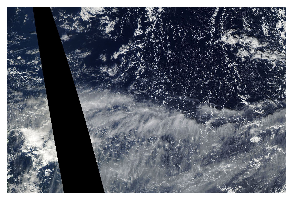

In [20]:
img_f = random.choice(fnames)
img = open_image(img_f)
img.show(figsize=(5, 5))

In [21]:
df_labels = pd.read_csv(PROJ_DIR / "data/raw/train.csv")
df_labels.head(10)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...
6,002be4f.jpg_Gravel,NaN
7,002be4f.jpg_Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...
8,0031ae9.jpg_Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...
9,0031ae9.jpg_Flower,2047 703 3447 703 4847 703 6247 703 7647 703 9...


### Reading Labels

In [22]:
shape = img.shape[-2:]
shape

torch.Size([1400, 2100])

## Create DataBunch

In [23]:
free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200:
    bs = 8
else:
    bs = 4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=4, have 5563MB of GPU RAM free


In [24]:
src_size = np.array(img.shape[1:])
src_size

array([1400, 2100])

In [ ]:
size = src_size // 4
bs = 2 
size

In [ ]:
src = (SegmentationItemList.from_folder(path_train_img)
       .split_by_rand_pct()
       .label_from_func(get_y_fn, classes=[0, 252, 253, 254, 255]))
src

In [ ]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))
data

In [ ]:
data.show_batch(2, figsize=(5,5))

In [ ]:
data.show_batch(2, figsize=(5, 5), ds_type=DatasetType.Valid)

In [ ]:
wd=1e-2

In [ ]:
learn = unet_learner(data, models.resnet34, wd=wd)

In [ ]:
lr_find(learn)